In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy.linalg import expm
from qiskit import QuantumCircuit
from qiskit.circuit.library import UnitaryGate
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import random
from qiskit.quantum_info import Operator
import pandas as pd

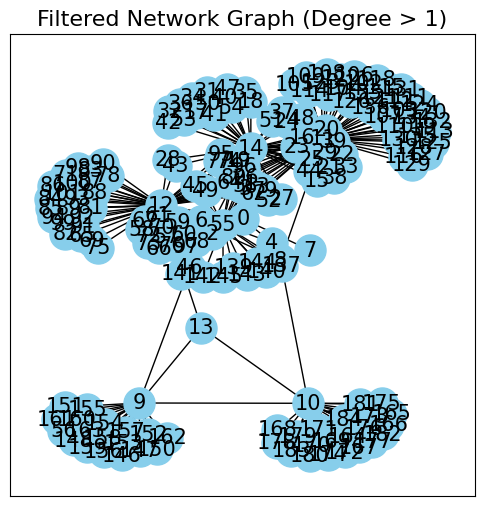

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Load the CSV
csv_path = "edges-morethan1.csv"  # Replace with your CSV file path
df = pd.read_csv(csv_path)

# Step 2: Create edges from 'Target' to 'Source'
edges = list(zip(df['Source'], df['Target']))

# Step 3: Define the network graph (undirected)
G = nx.Graph()  # Use Graph() for an undirected graph
G.add_edges_from(edges)

# Step 6: Plot the filtered graph
plt.figure(figsize=(6, 6))
nx.draw_networkx(G, with_labels=True, node_color='skyblue', node_size=500, font_size=15)
plt.title("Network Graph", fontsize=16)
plt.show()



Number of remaining nodes (degree > 1): 51


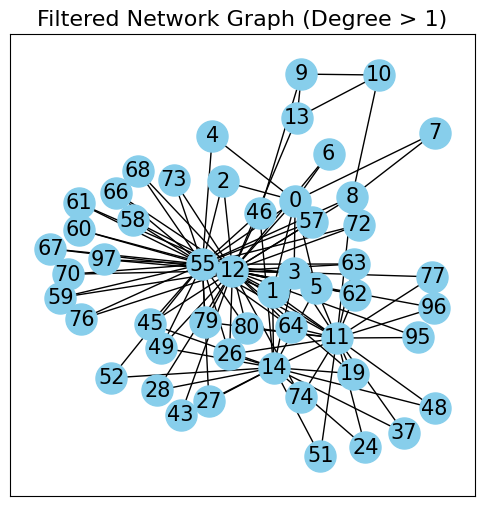

In [11]:
# Step 4: Remove nodes with degree 0 or 1
nodes_to_remove = [node for node, degree in dict(G.degree()).items() if degree <= 1]
G.remove_nodes_from(nodes_to_remove)

# Step 5: Count remaining nodes
num_nodes = G.number_of_nodes()
print(f"Number of remaining nodes (degree > 1): {num_nodes}")

# Step 6: Plot the filtered graph
plt.figure(figsize=(6, 6))
nx.draw_networkx(G, with_labels=True, node_color='skyblue', node_size=500, font_size=15)
plt.title("Filtered Network Graph (Degree > 1)", fontsize=16)
plt.show()

Added 13 unconnected nodes to reach 64 total.
Total number of nodes after adding: 64


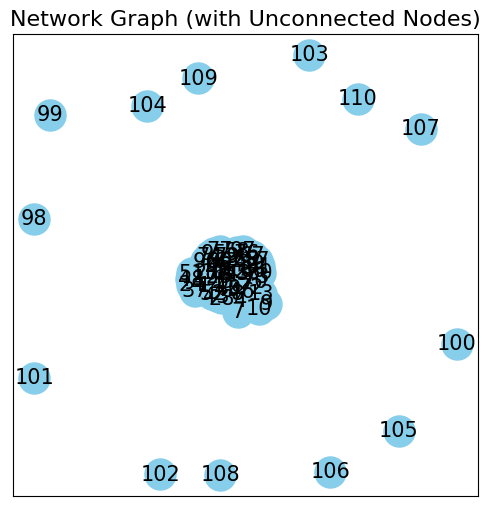

In [4]:


# Step 3: Define the network graph (undirected)
G = nx.Graph()  # Use Graph() for an undirected graph
G.add_edges_from(edges)


# Step 4: Remove nodes with degree 0 or 1
nodes_to_remove = [node for node, degree in dict(G.degree()).items() if degree <= 1]
G.remove_nodes_from(nodes_to_remove)

# Step 5: Add unconnected nodes to reach 64 total
current_num_nodes = G.number_of_nodes()
additional_nodes_needed = 64 - current_num_nodes

if additional_nodes_needed > 0:
    # Create a list of new node IDs that do not overlap with existing nodes
    max_node_id = max(G.nodes) if len(G.nodes) > 0 else -1
    new_nodes = range(max_node_id + 1, max_node_id + 1 + additional_nodes_needed)
    G.add_nodes_from(new_nodes)
    print(f"Added {additional_nodes_needed} unconnected nodes to reach 64 total.")

# Step 6: Verify the total number of nodes
total_nodes = G.number_of_nodes()
print(f"Total number of nodes after adding: {total_nodes}")

# Step 7: Plot the graph
plt.figure(figsize=(6, 6))
nx.draw_networkx(G, with_labels=True, node_color='skyblue', node_size=500, font_size=15)
plt.title("Network Graph (with Unconnected Nodes)", fontsize=16)
plt.show()


Added 13 unconnected nodes to reach 64 total.
Node Mapping Table:
Total number of nodes after relabeling: 64


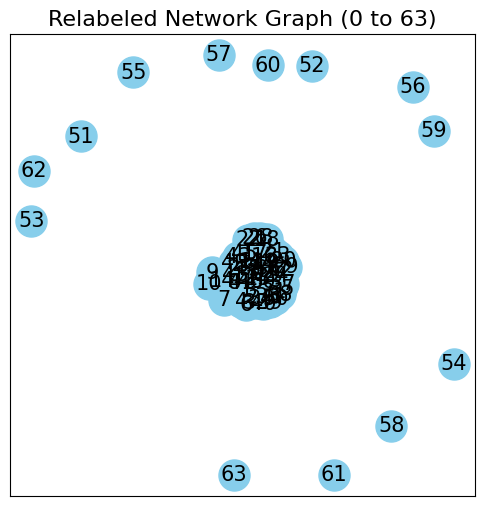

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Load the CSV
csv_path = "edges-morethan1.csv"  # Replace with your CSV file path
df = pd.read_csv(csv_path)

# Step 2: Create edges from 'Target' to 'Source'
edges = list(zip(df['Source'], df['Target']))

# Step 3: Define the network graph (undirected)
G = nx.Graph()  # Use Graph() for an undirected graph
G.add_edges_from(edges)

# Step 4: Remove nodes with degree 0 or 1
nodes_to_remove = [node for node, degree in dict(G.degree()).items() if degree <= 1]
G.remove_nodes_from(nodes_to_remove)

# Step 5: Add unconnected nodes to reach 64 total
current_num_nodes = G.number_of_nodes()
additional_nodes_needed = 64 - current_num_nodes

if additional_nodes_needed > 0:
    # Create a list of new node IDs that do not overlap with existing nodes
    max_node_id = max(G.nodes) if len(G.nodes) > 0 else -1
    new_nodes = range(max_node_id + 1, max_node_id + 1 + additional_nodes_needed)
    G.add_nodes_from(new_nodes)
    print(f"Added {additional_nodes_needed} unconnected nodes to reach 64 total.")

# Step 6: Relabel nodes to range from 0 to 63
old_to_new_mapping = {old_id: new_id for new_id, old_id in enumerate(G.nodes())}
G = nx.relabel_nodes(G, old_to_new_mapping)

# Step 7: Create a table mapping old IDs to new IDs
mapping_table = pd.DataFrame(list(old_to_new_mapping.items()), columns=["Old ID", "New ID"])
print("Node Mapping Table:")


# Step 8: Verify the total number of nodes
total_nodes = G.number_of_nodes()
print(f"Total number of nodes after relabeling: {total_nodes}")

# Step 9: Plot the relabeled graph
plt.figure(figsize=(6, 6))
nx.draw_networkx(G, with_labels=True, node_color='skyblue', node_size=500, font_size=15)
plt.title("Relabeled Network Graph (0 to 63)", fontsize=16)
plt.show()


In [6]:
print(mapping_table)
# Save the mapping table to a CSV file
mapping_table.to_csv("node_mapping_table.csv", index=False)
print("Mapping table saved to 'node_mapping_table.csv'.")


    Old ID  New ID
0        1       0
1        0       1
2        2       2
3        3       3
4        4       4
..     ...     ...
59     106      59
60     107      60
61     108      61
62     109      62
63     110      63

[64 rows x 2 columns]
Mapping table saved to 'node_mapping_table.csv'.


In [7]:
# Step 3: Adjacency matrix of the graph
adj_matrix = nx.adjacency_matrix(G).toarray()
print("Adjacency Matrix:")
print(adj_matrix)

# Define the Hermitian matrix A for use in the quantum link prediction
A = adj_matrix.astype(float)

Adjacency Matrix:
[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:

def quantum_walk_t(A,t,n:int): 
    """
    Creates a quantum circuit for a quantum random walk at a specific time t starting at node n

    """
    # Intialize a quantum circuit
    num_target_qubits = int(np.log2(A.shape[0]))  # Infer target qubits from A
    qc = QuantumCircuit(num_target_qubits)  

    # Convert n to binary
    binary= format(n, f'0{num_target_qubits}b')
    
    # Encode starting node 
    for i, bit in enumerate(reversed(binary)):  # Reverse to match Qiskit's qubit indexing
        if bit == '1':
            qc.x(i)

    # Calculate e^{-iAt}
    i = complex(0, 1)
    U_minus = expm(-i * A * t)  # e^{-iAt}



    qc.unitary(Operator(U_minus), range(num_target_qubits))

    qc.measure_all()

    return qc

def measure_quantum_circuit(qc, simulator: str):
    """
        Runs a simulation of a quantum circuit and returns counts at that point
    """ 
    sim = Aer.get_backend(simulator) 
    result = sim.run(qc).result()
    counts = result.get_counts()
    return counts

def add_max_and_avg(df):
    """
    Adds a row with the maximum value of each column (P-max) and the average of each column (P-avg).
    """
    # Find max values
    p_max = df.drop('Time', axis=1).max()
    
    # Find average values
    p_avg = df.drop('Time', axis=1).mean()

    # Add to DF 
    df.loc[len(df)] = ['P-max'] + p_max.tolist()
    df.loc[len(df)] = ['P-avg'] + p_avg.tolist()
    
    return df

In [9]:
import pandas as pd
import numpy as np

# Define 64 possible nodes (6-bit binary strings)
possible_nodes = [f'{i:06b}' for i in range(64)]

# Initialize the DataFrame with the possible nodes as columns
columns = ['Time'] + possible_nodes
results_df = pd.DataFrame(columns=columns)

# Loop through the times and simulate the quantum walk
for i in np.arange(0, 10, 0.5):  # Change range as needed
    qc = quantum_walk_t(A, i, 9)
    counts = measure_quantum_circuit(qc, 'aer_simulator')

    # Ensure all possible nodes are represented, even if they have a count of 0
    for node in possible_nodes:
        if node not in counts:
            counts[node] = 0

    shots = 1024  # Total number of shots for normalization
    probabilities = {key: value / shots for key, value in counts.items()}

    # Saving results to DataFrame
    row = [i] + [probabilities.get(node, 0) for node in possible_nodes]  # Ensure 0 if key not found
    results_df.loc[len(results_df)] = row

# Print the results DataFrame

add_max_and_avg(results_df)
print(results_df)
results_df.to_csv("resultstrial2-9.csv", index=False)



     Time    000000    000001    000010    000011    000100    000101  \
0     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     0.5  0.000977  0.001953  0.000977  0.000000  0.000000  0.000977   
2     1.0  0.000000  0.004883  0.000000  0.000000  0.001953  0.000000   
3     1.5  0.000977  0.005859  0.000977  0.005859  0.020508  0.001953   
4     2.0  0.004883  0.000000  0.002930  0.004883  0.016602  0.007812   
5     2.5  0.001953  0.005859  0.003906  0.005859  0.001953  0.002930   
6     3.0  0.000000  0.008789  0.000000  0.003906  0.005859  0.000977   
7     3.5  0.000000  0.002930  0.000000  0.000000  0.004883  0.000000   
8     4.0  0.000000  0.009766  0.000000  0.000000  0.000977  0.000000   
9     4.5  0.003906  0.023438  0.002930  0.002930  0.002930  0.004883   
10    5.0  0.008789  0.000977  0.017578  0.008789  0.021484  0.009766   
11    5.5  0.007812  0.037109  0.006836  0.010742  0.017578  0.004883   
12    6.0  0.001953  0.045898  0.002930  0.000977  